In [1]:
# Lab | Cleaning categorical data
# For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

# Instructions
# 1.	Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
# 2.	Find all of the categorical data. Save it in a categorical_df variable.
# 3.	Check for NaN values.
# 4.	Check all unique values of columns.
# 5.	Check dtypes. Do they all make sense as categorical data?
# 6.	Does any column contain alpha and numeric data? Decide how to clean it.
# 7.	Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.
# 8.	Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?
# THEY DO CONTAIN THE SAME INFORMATION ONE OF THESE ARE ALPHANUMERIC, 
# 9.	Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.
# SO THAT YOU CAN HAVE LESS VALUES IN CATEGORICAL COLUMNS , IS THERE ANYTHING THAT YOU CAN COMBINE ?
# THAT KIND OF GOES ALONG WITH NUMBER 7 
# IF YOU ARE GOING TO DO THE SAME, LOGICAL REASONING PROCESS


In [2]:
# # 1.	Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1 Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df


In [5]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [6]:

# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [7]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols


In [8]:
# date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [9]:
#Check NaNs Total
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [10]:

# Check NaNs (Percentage)
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [11]:

customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [12]:

# Income variable first quartile  min. Too many zeros. 
customer_df['income'].value_counts()
#Length: n. of unique values



0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [13]:
median_income=customer_df['income'].median(skipna=True)
customer_df['income']=customer_df.income.mask(customer_df.income==0,median_income)


In [14]:

customer_df['income'].value_counts()


33889.5    2317
95697.0      12
27972.0       7
25370.0       7
61108.0       7
           ... 
36529.0       1
25859.0       1
38179.0       1
70190.0       1
21941.0       1
Name: income, Length: 5694, dtype: int64

In [15]:

numericals = customer_df.select_dtypes(np.number)
numericals.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879


In [16]:
numericals.nunique()


customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [17]:


discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]


In [18]:
discrete


['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [19]:
continuous = list(numericals.drop(columns = discrete).columns)

In [20]:

continuous


['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [21]:

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [22]:
categorical = customer_df.select_dtypes(object)

In [23]:

categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [24]:


categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]


In [25]:
categorical_columns

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [26]:

categorical_df=customer_df[categorical_columns]


In [27]:

categorical_df


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [28]:

continuous_df = numericals.drop(columns = discrete)


In [29]:
continuous_df.head()


,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879


In [30]:

discrete_df = numericals[discrete]

In [31]:

discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


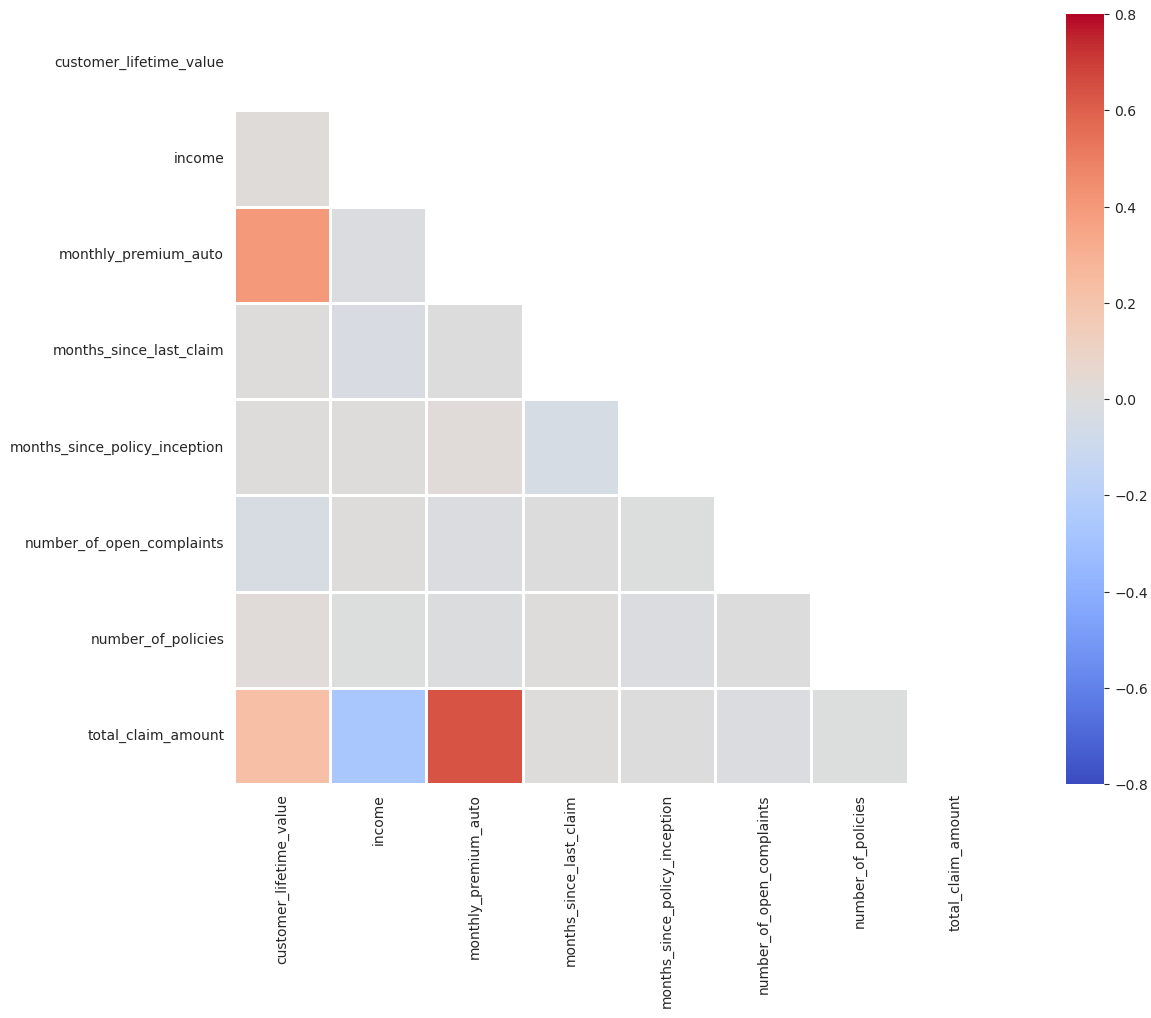

In [32]:

mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

In [34]:
def df_bar(df):
    sns.set(rc={'figure.figsize':(32,16)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

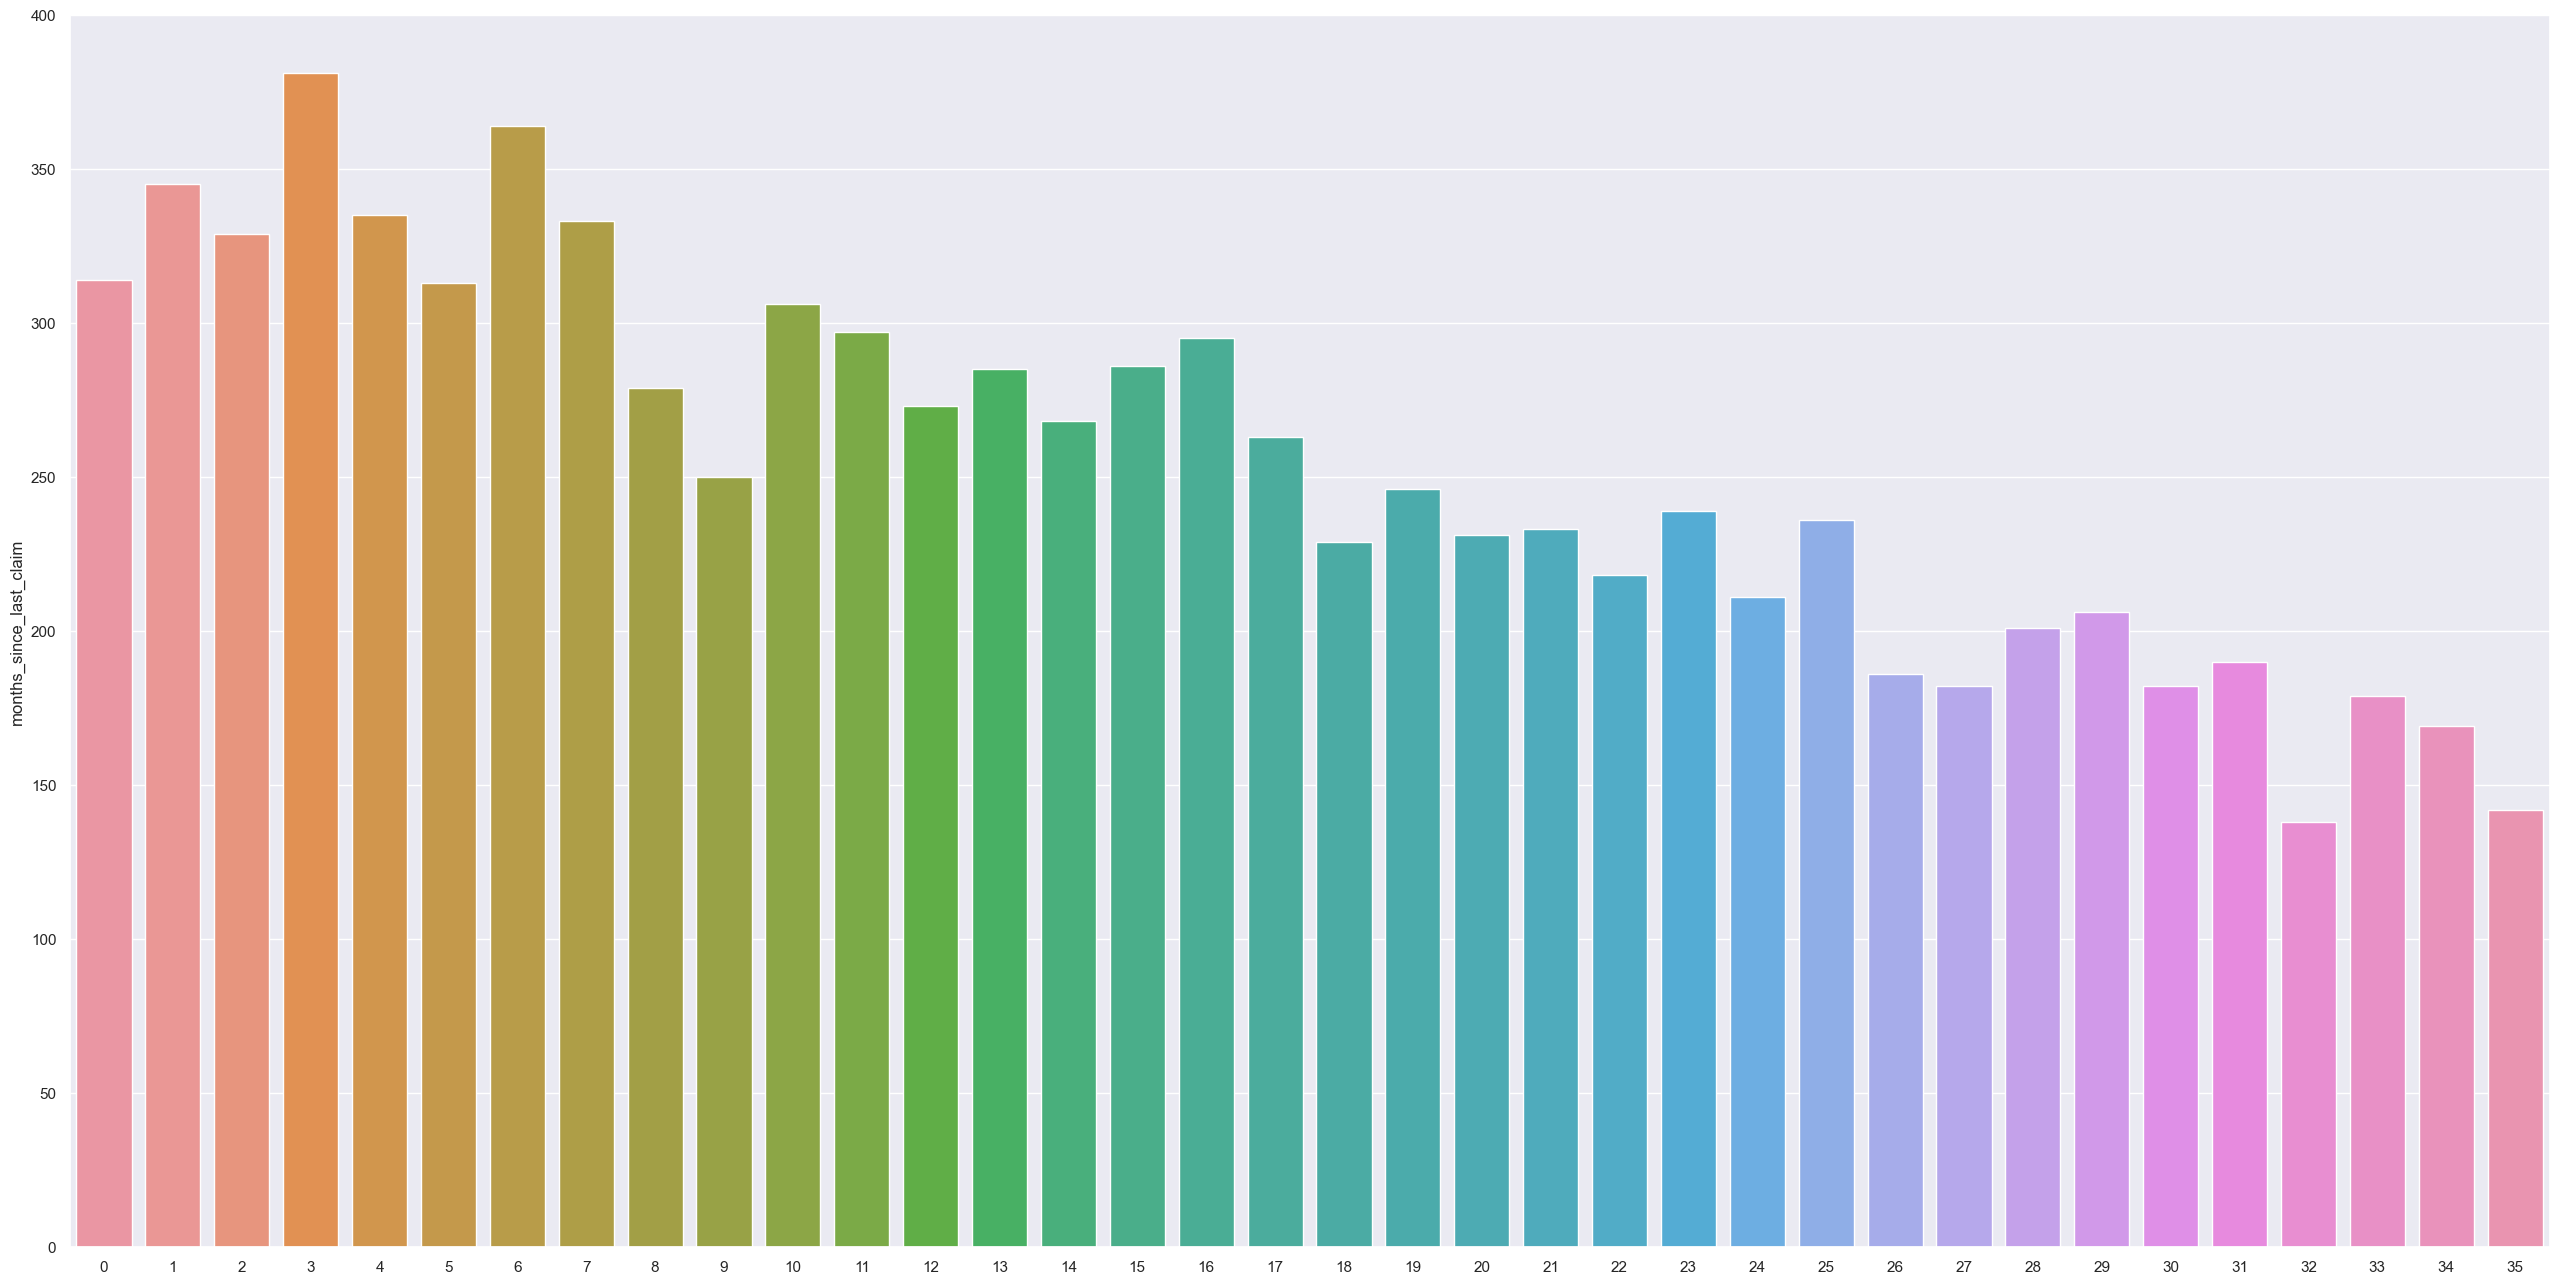

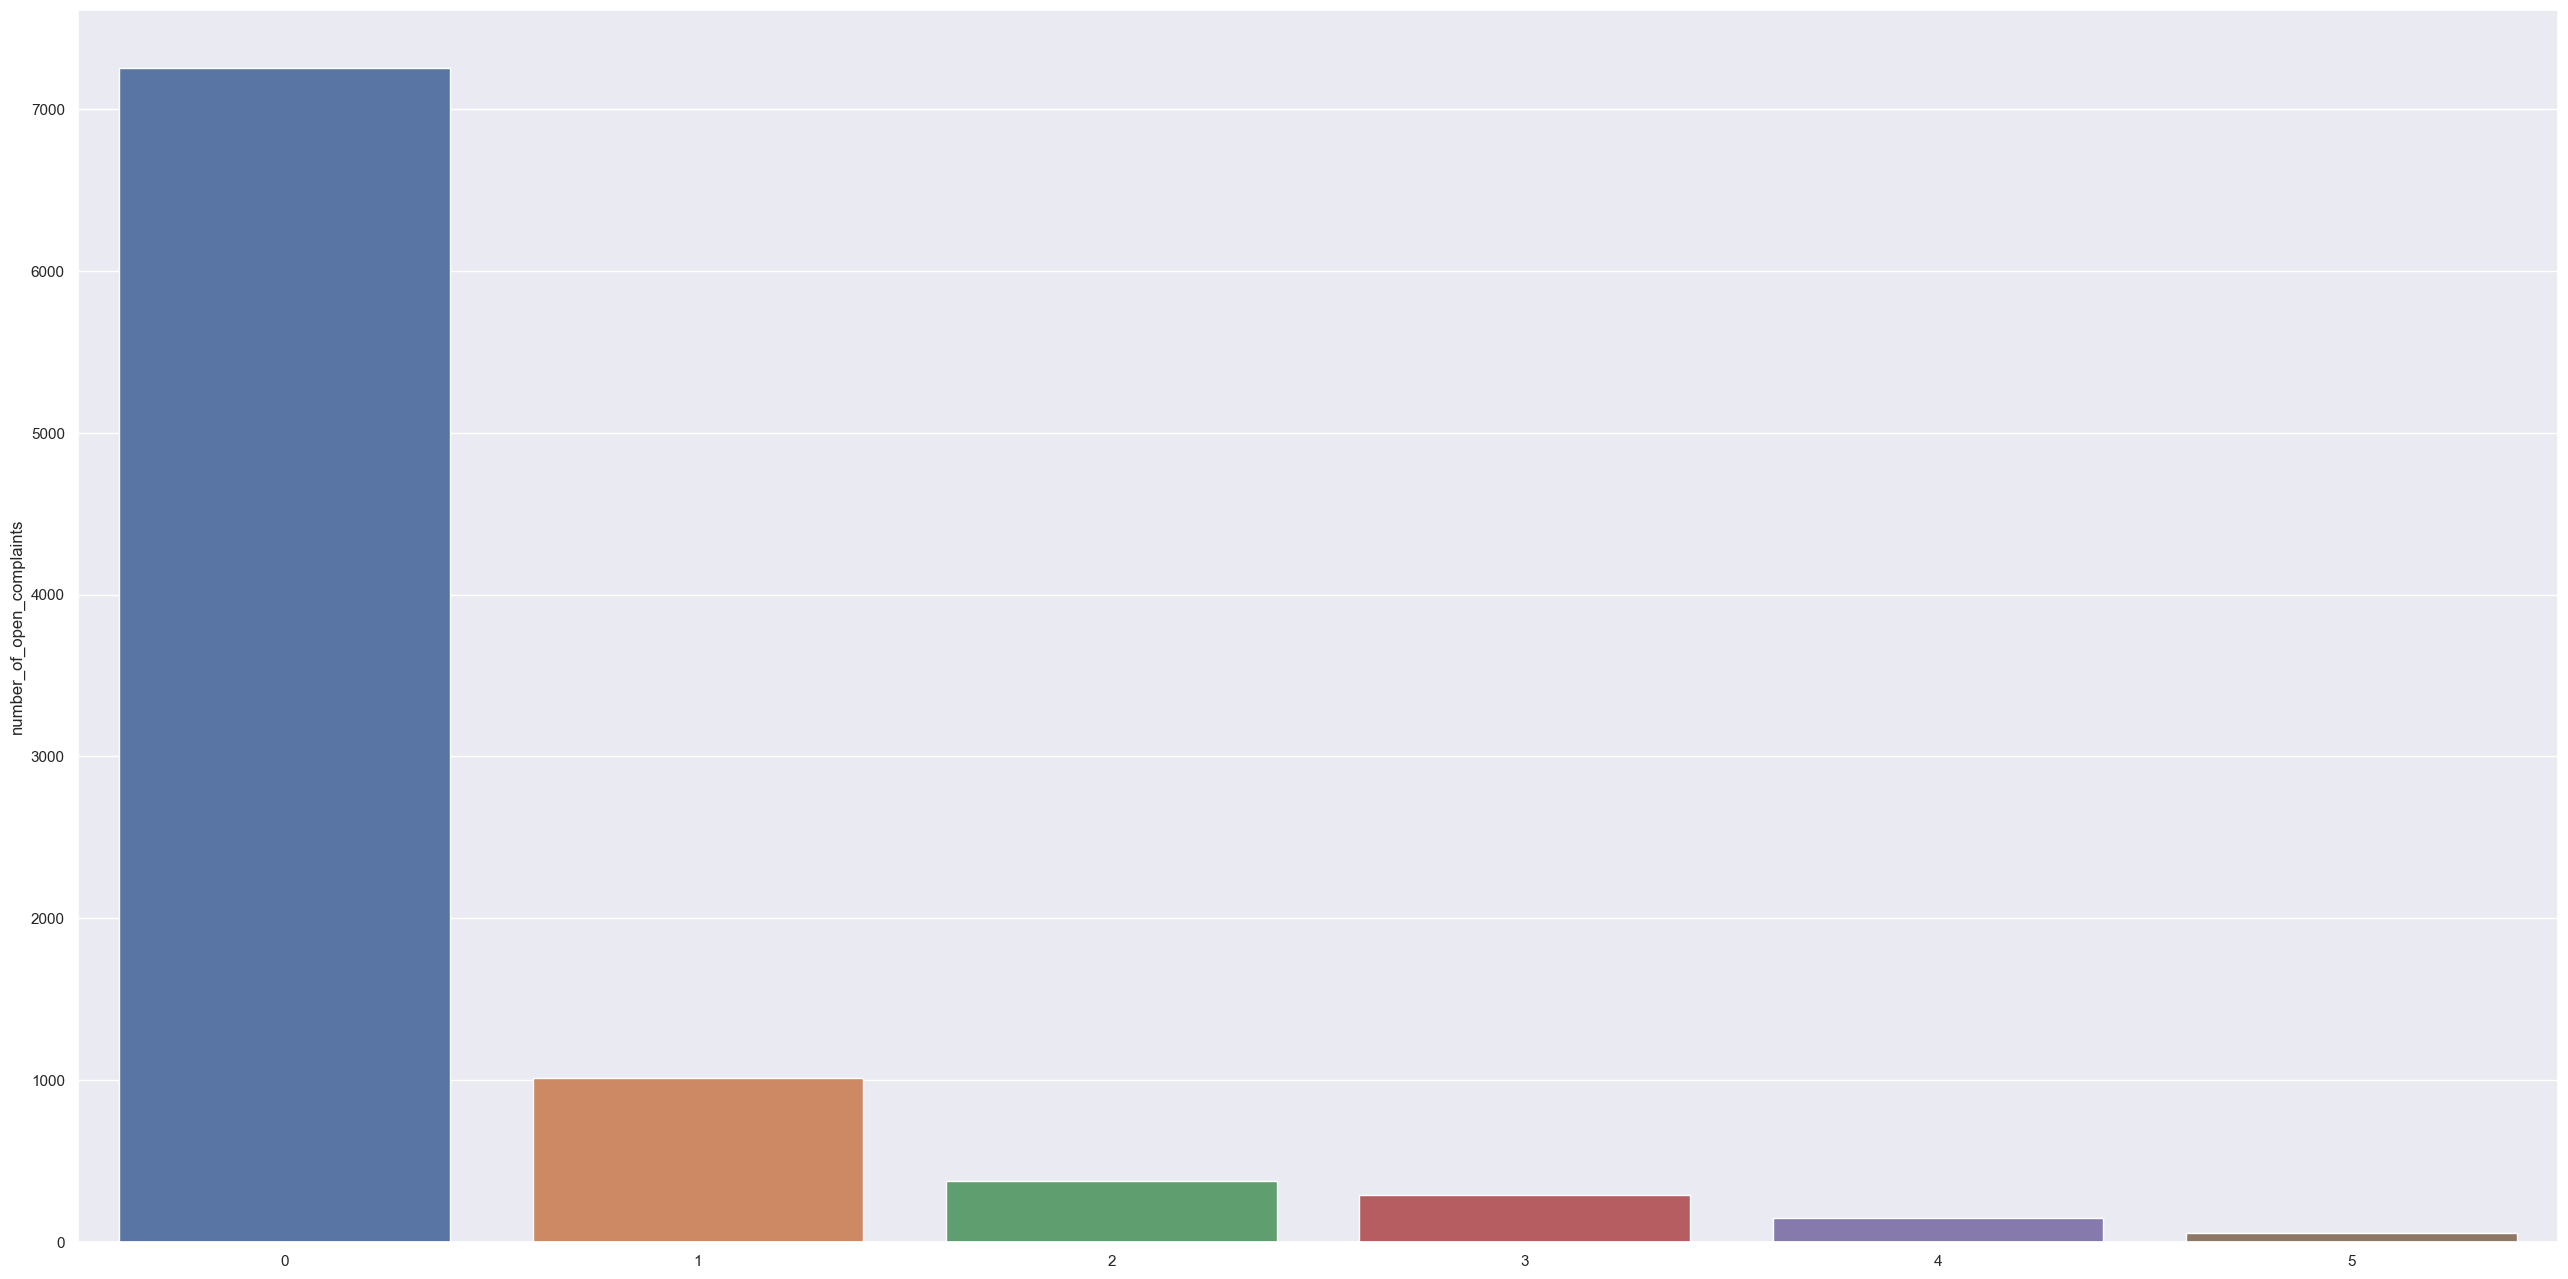

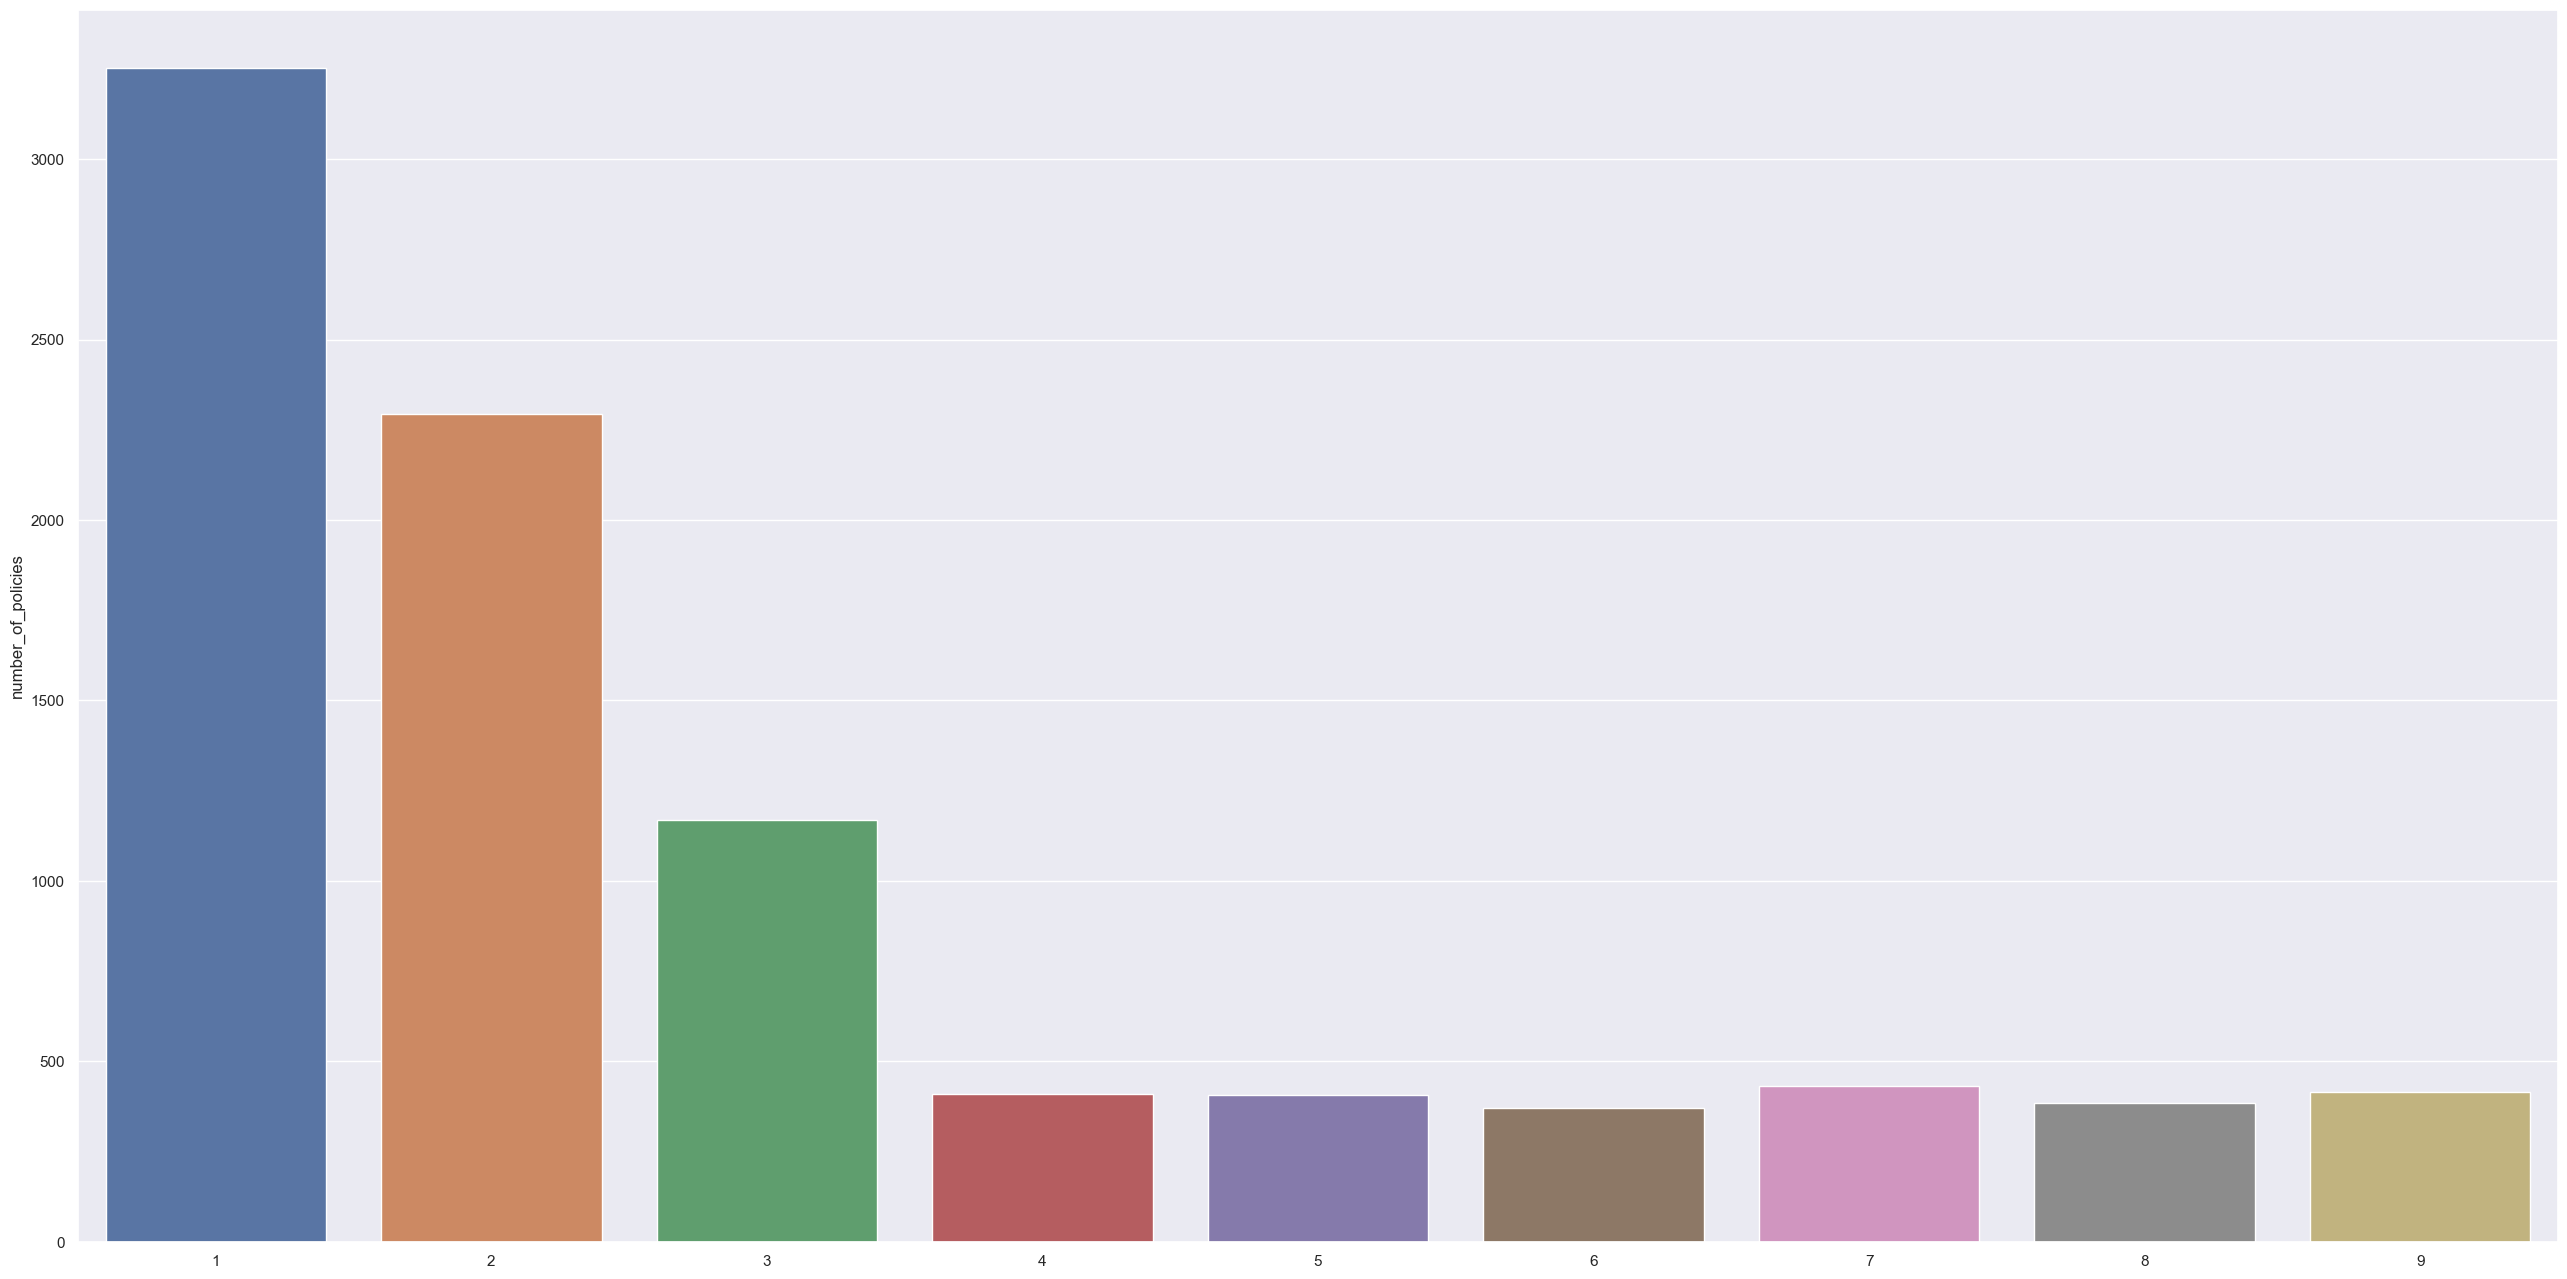

In [35]:

df_bar(discrete_df)

In [36]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()


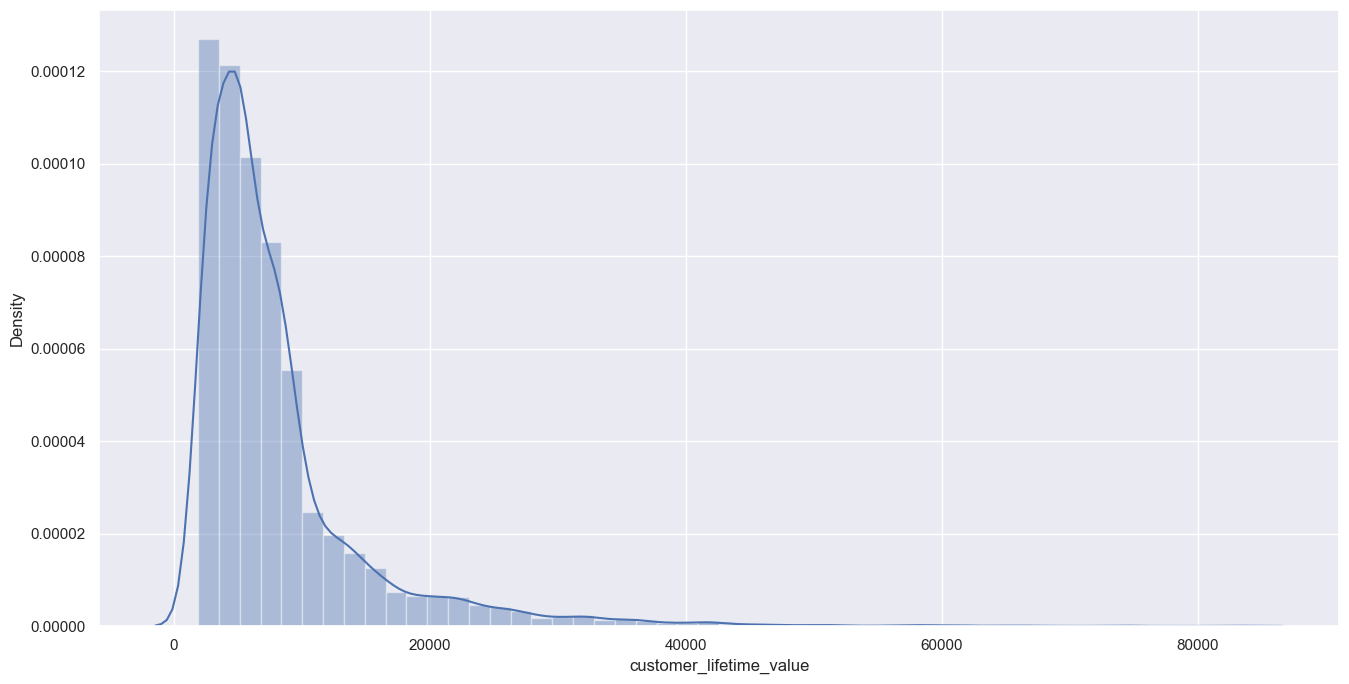

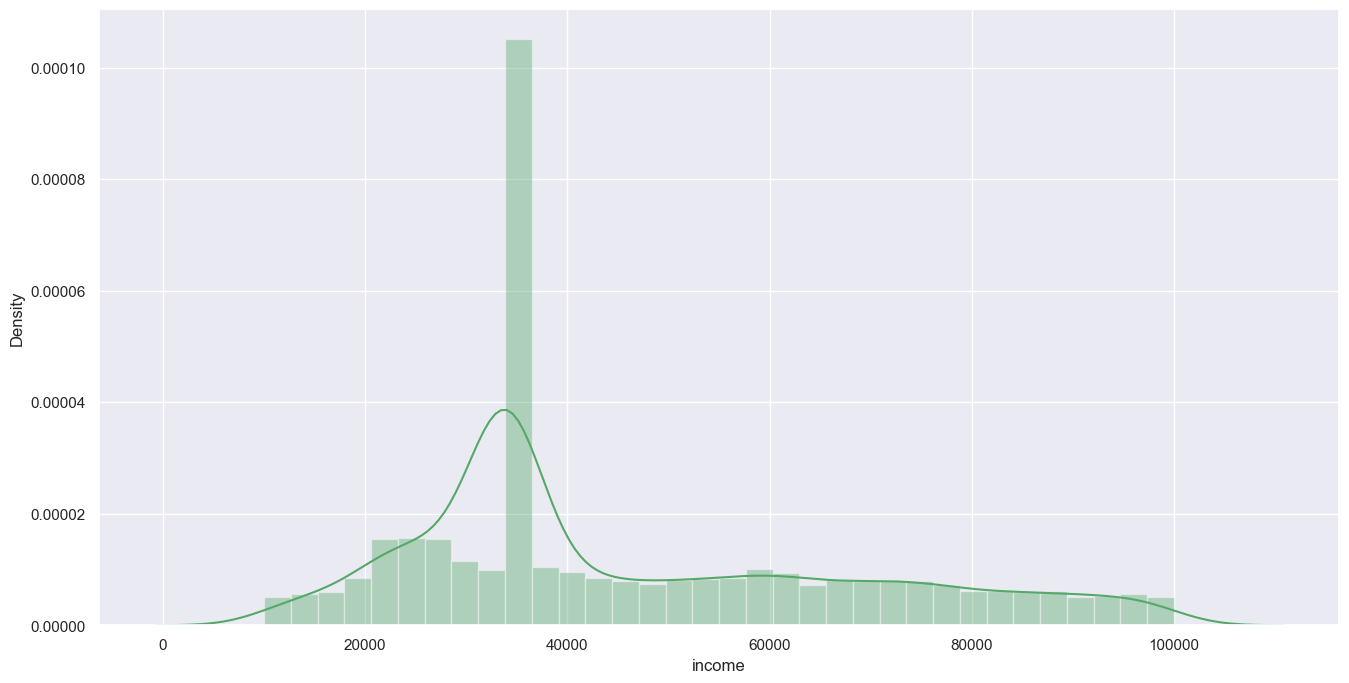

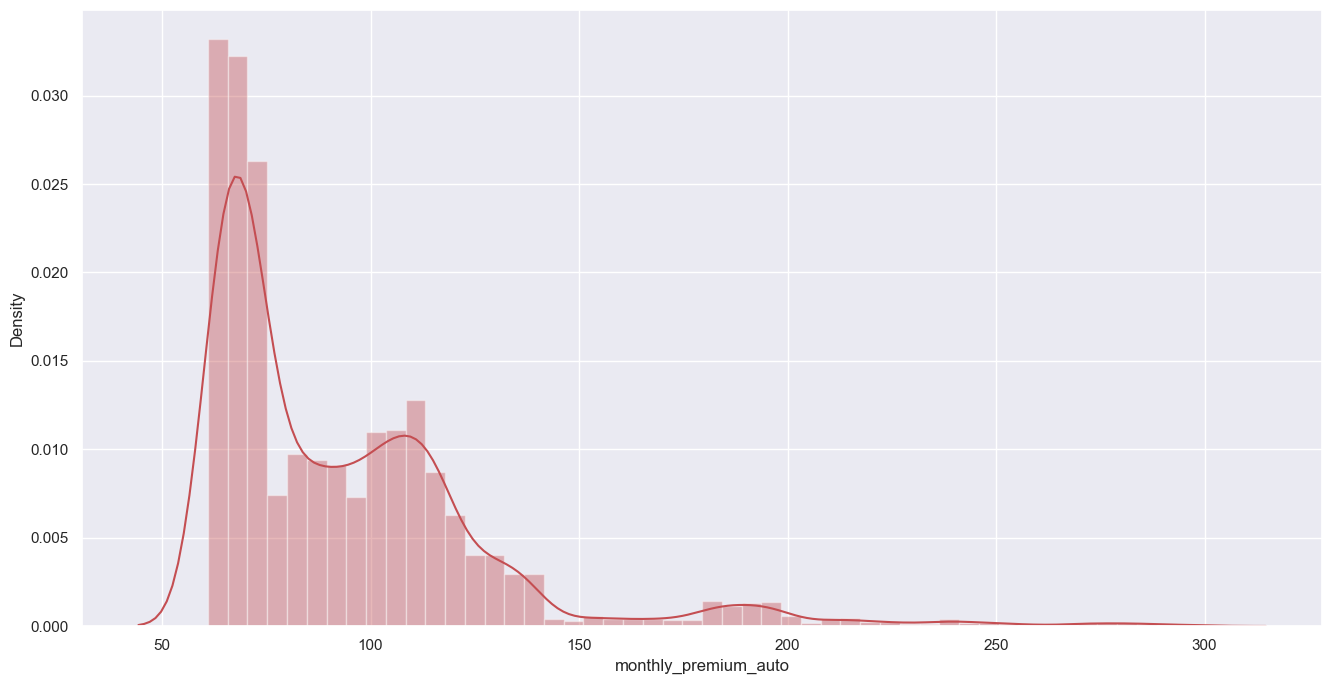

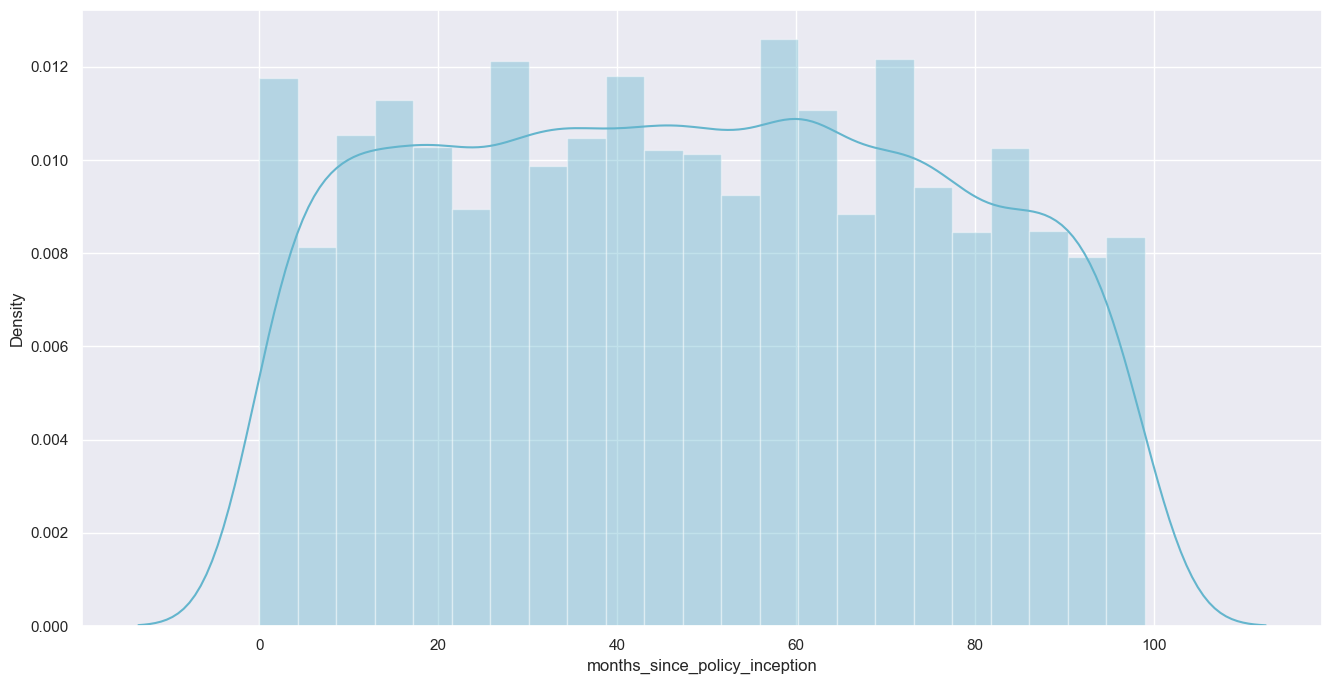

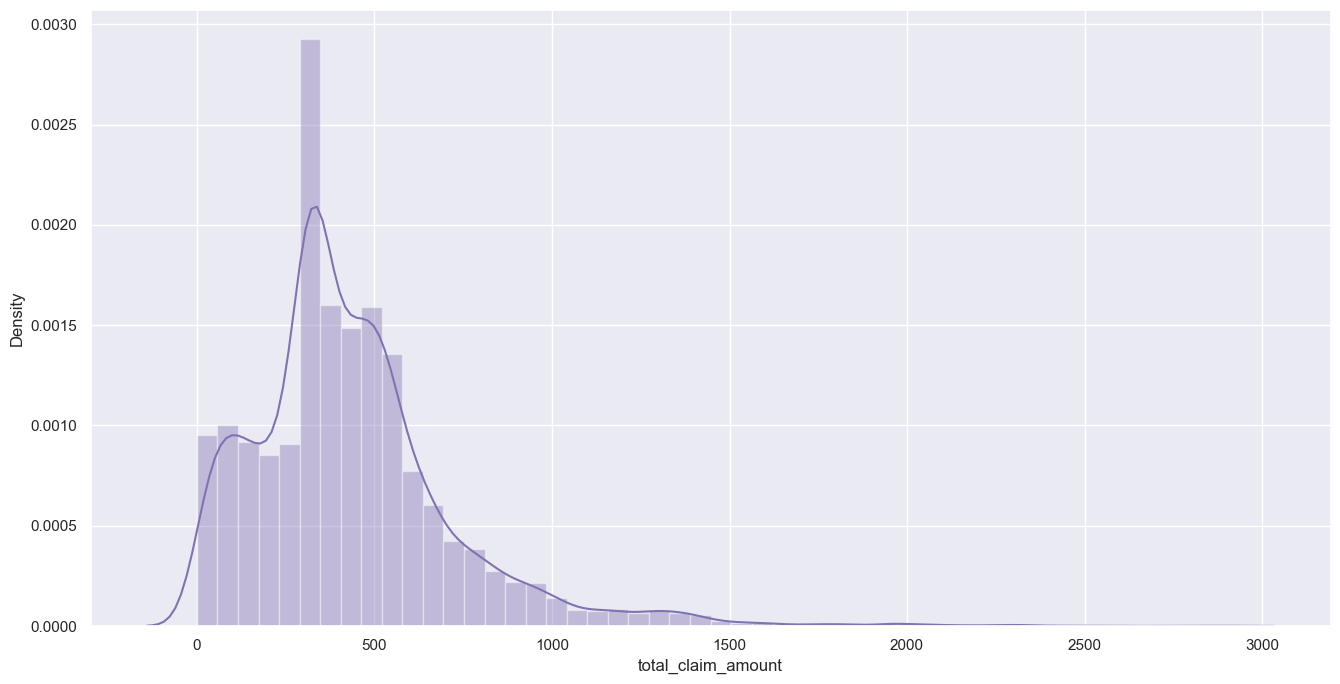

In [37]:
df_hist(continuous_df)


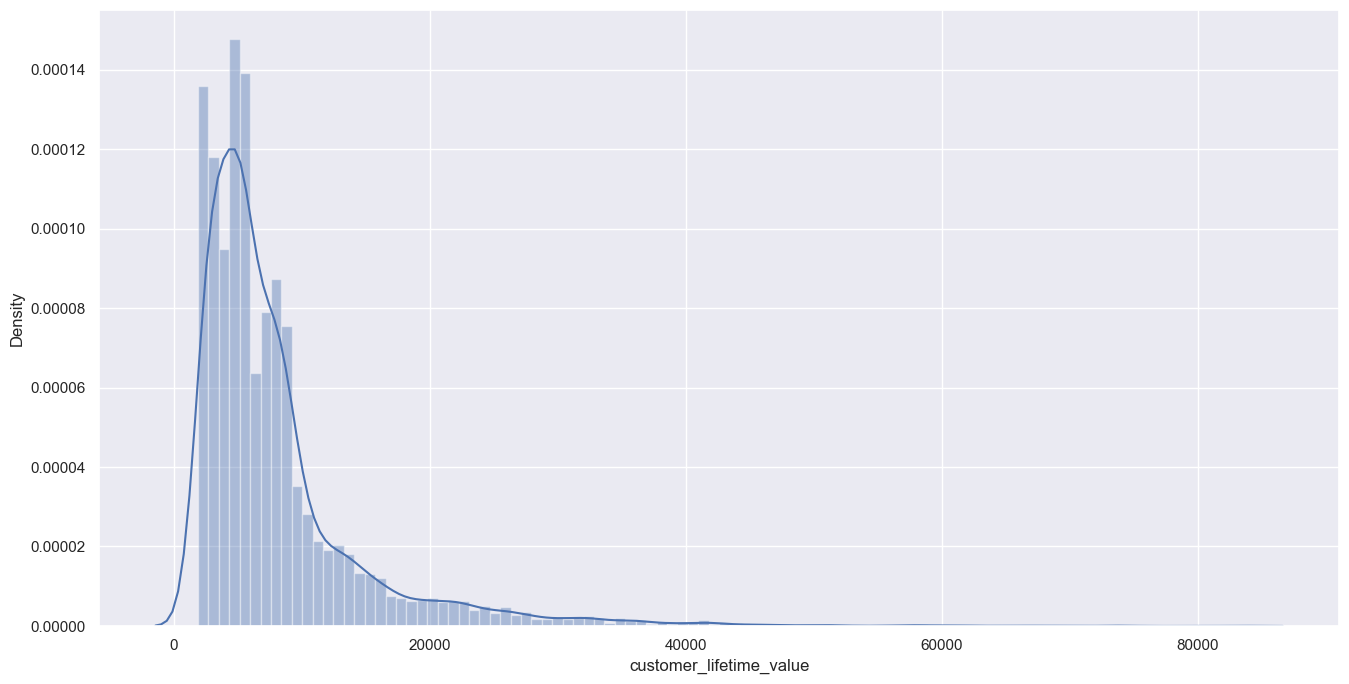

In [38]:
sns.distplot(continuous_df["customer_lifetime_value"], bins = 100);


In [39]:
continuous_df["customer_lifetime_value"].value_counts()


7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

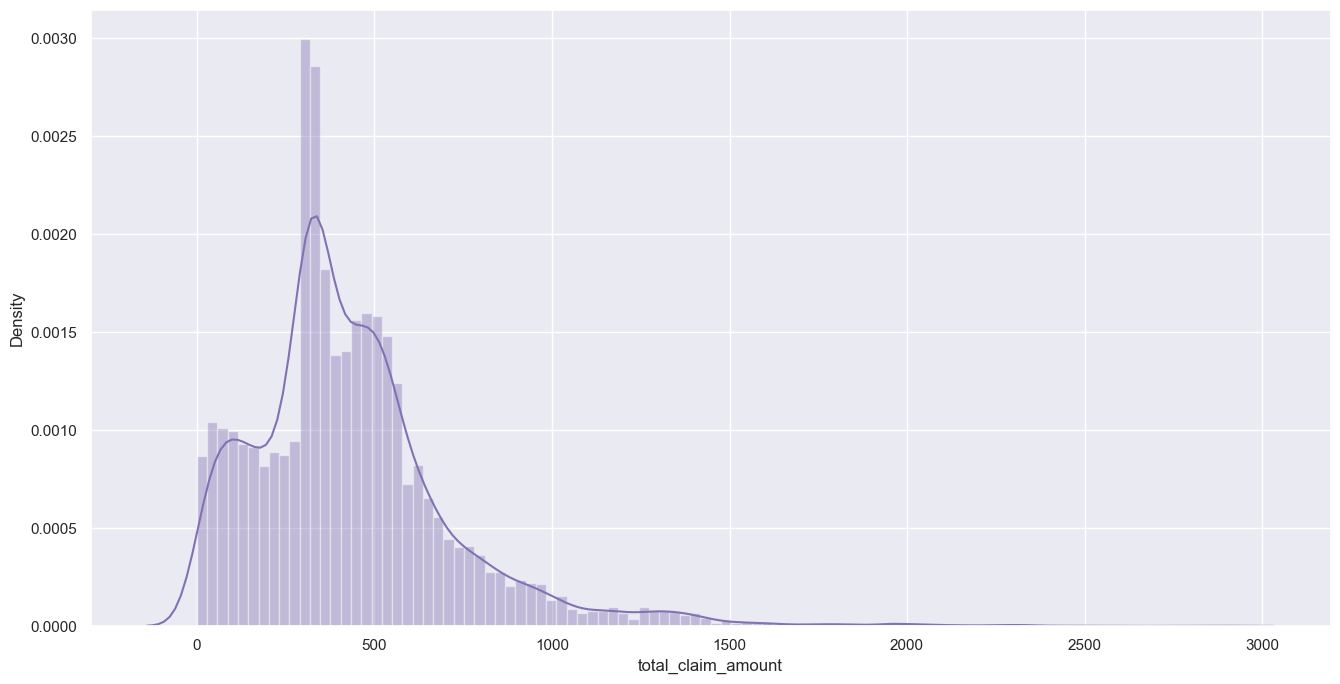

In [40]:


sns.distplot(continuous_df["total_claim_amount"], bins = 100, color = list(BASE_COLORS.keys())[4]);

In [41]:
continuous_df["total_claim_amount"].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
377.442796      1
20.985105       1
280.897050      1
268.130863      1
790.784983      1
Name: total_claim_amount, Length: 5106, dtype: int64

In [42]:

continuous[:3]


['customer_lifetime_value', 'income', 'monthly_premium_auto']

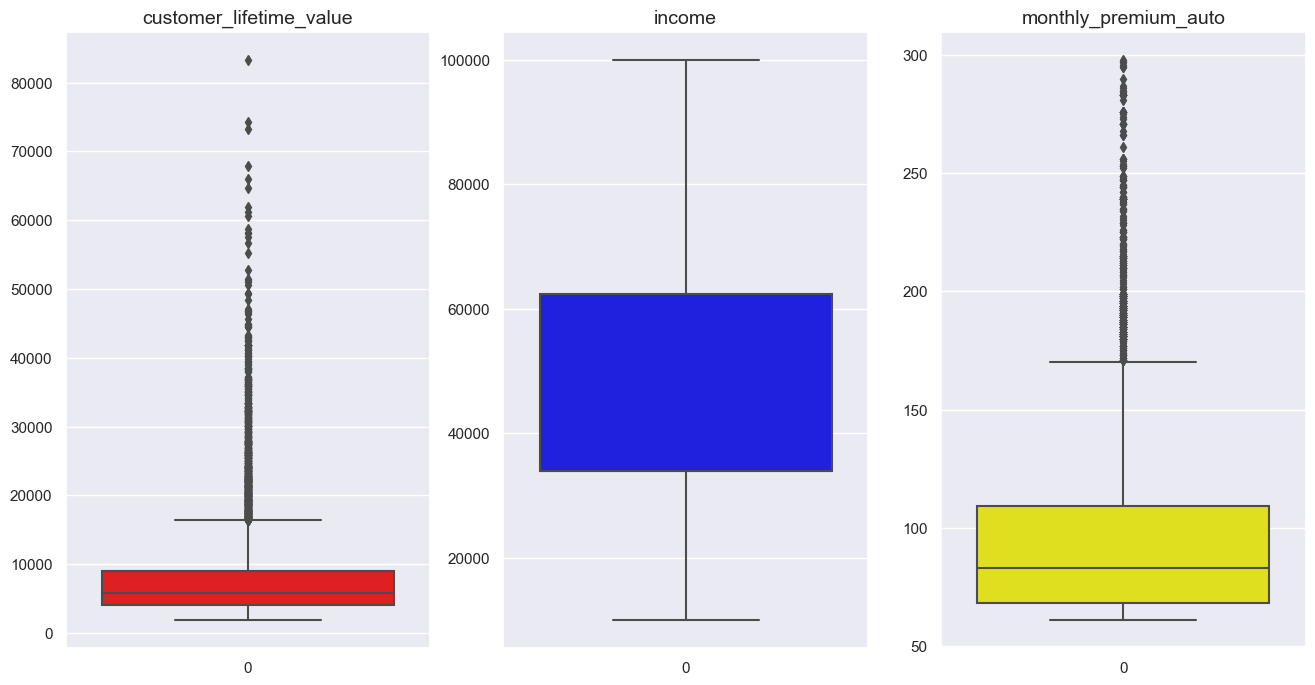

In [44]:

box_colors = ["red", "blue", "yellow"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();
